# homework7_Tiugai

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('Real estate.csv')
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
# drop No column
dataset = dataset.drop(['No'],axis='columns')
dataset

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
dataset['X5 latitude'].describe()

count    414.000000
mean      24.969030
std        0.012410
min       24.932070
25%       24.963000
50%       24.971100
75%       24.977455
max       25.014590
Name: X5 latitude, dtype: float64

In [5]:
dataset['X6 longitude'].describe()

count    414.000000
mean     121.533361
std        0.015347
min      121.473530
25%      121.528085
50%      121.538630
75%      121.543305
max      121.566270
Name: X6 longitude, dtype: float64

In [6]:
dataset['X1 transaction date'].describe()

count     414.000000
mean     2013.148971
std         0.281967
min      2012.667000
25%      2012.917000
50%      2013.167000
75%      2013.417000
max      2013.583000
Name: X1 transaction date, dtype: float64

In [7]:
dataset['X2 house age'].describe()

count    414.000000
mean      17.712560
std       11.392485
min        0.000000
25%        9.025000
50%       16.100000
75%       28.150000
max       43.800000
Name: X2 house age, dtype: float64

In [8]:
dataset['X3 distance to the nearest MRT station'].describe()

count     414.000000
mean     1083.885689
std      1262.109595
min        23.382840
25%       289.324800
50%       492.231300
75%      1454.279000
max      6488.021000
Name: X3 distance to the nearest MRT station, dtype: float64

In [9]:
dataset['X4 number of convenience stores'].describe()

count    414.000000
mean       4.094203
std        2.945562
min        0.000000
25%        1.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: X4 number of convenience stores, dtype: float64

In [10]:
# In data 'X3 distance to the nearest MRT station' max value 6488 looks like outlier. 
# Let's try drop some rows where value great then max + std.

In [11]:
params = dataset['X3 distance to the nearest MRT station'].describe()
ind_outlier = dataset[dataset['X3 distance to the nearest MRT station'] > (params['75%']+params['std'])].index
df_less_dataset = dataset.drop(ind_outlier, axis=0)
len(df_less_dataset)

373

In [12]:
df_less_dataset['X3 distance to the nearest MRT station'].describe()

count     373.000000
mean      730.788569
std       663.755967
min        23.382840
25%       279.172600
50%       461.101600
75%      1055.067000
max      2707.392000
Name: X3 distance to the nearest MRT station, dtype: float64

In [13]:
from sklearn import preprocessing
dataset_norm=preprocessing.normalize(df_less_dataset)
dataset_norm=pd.DataFrame(dataset_norm)
dataset_norm.columns=dataset.columns
dataset_norm

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194,0.018770
1,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565,0.020682
2,0.961230,0.006349,0.268276,0.002387,0.011928,0.058022,0.022580
3,0.961143,0.006349,0.268263,0.002387,0.011928,0.058019,0.026159
4,0.979676,0.002434,0.190095,0.002434,0.012158,0.059157,0.020977
...,...,...,...,...,...,...,...
368,0.678559,0.006235,0.733267,0.001011,0.008413,0.040952,0.009470
369,0.996783,0.002773,0.044799,0.004457,0.012369,0.060195,0.024763
370,0.979631,0.009148,0.190243,0.003406,0.012155,0.059140,0.019756
371,0.996413,0.004009,0.051880,0.002475,0.012358,0.060161,0.025987


In [14]:
priceData = dataset_norm.iloc[:,-1]

In [15]:
dataset_norm = dataset_norm.drop(['Y house price of unit area'],axis='columns')
dataset_norm

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.996909,0.015848,0.042037,0.004953,0.012373,0.060194
1,0.986502,0.009557,0.150258,0.004411,0.012243,0.059565
2,0.961230,0.006349,0.268276,0.002387,0.011928,0.058022
3,0.961143,0.006349,0.268263,0.002387,0.011928,0.058019
4,0.979676,0.002434,0.190095,0.002434,0.012158,0.059157
...,...,...,...,...,...,...
368,0.678559,0.006235,0.733267,0.001011,0.008413,0.040952
369,0.996783,0.002773,0.044799,0.004457,0.012369,0.060195
370,0.979631,0.009148,0.190243,0.003406,0.012155,0.059140
371,0.996413,0.004009,0.051880,0.002475,0.012358,0.060161


In [16]:
X=dataset_norm
y=priceData
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.0021090877052795595


In [19]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 8.738894436516758e-06


In [20]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.002956162112692191


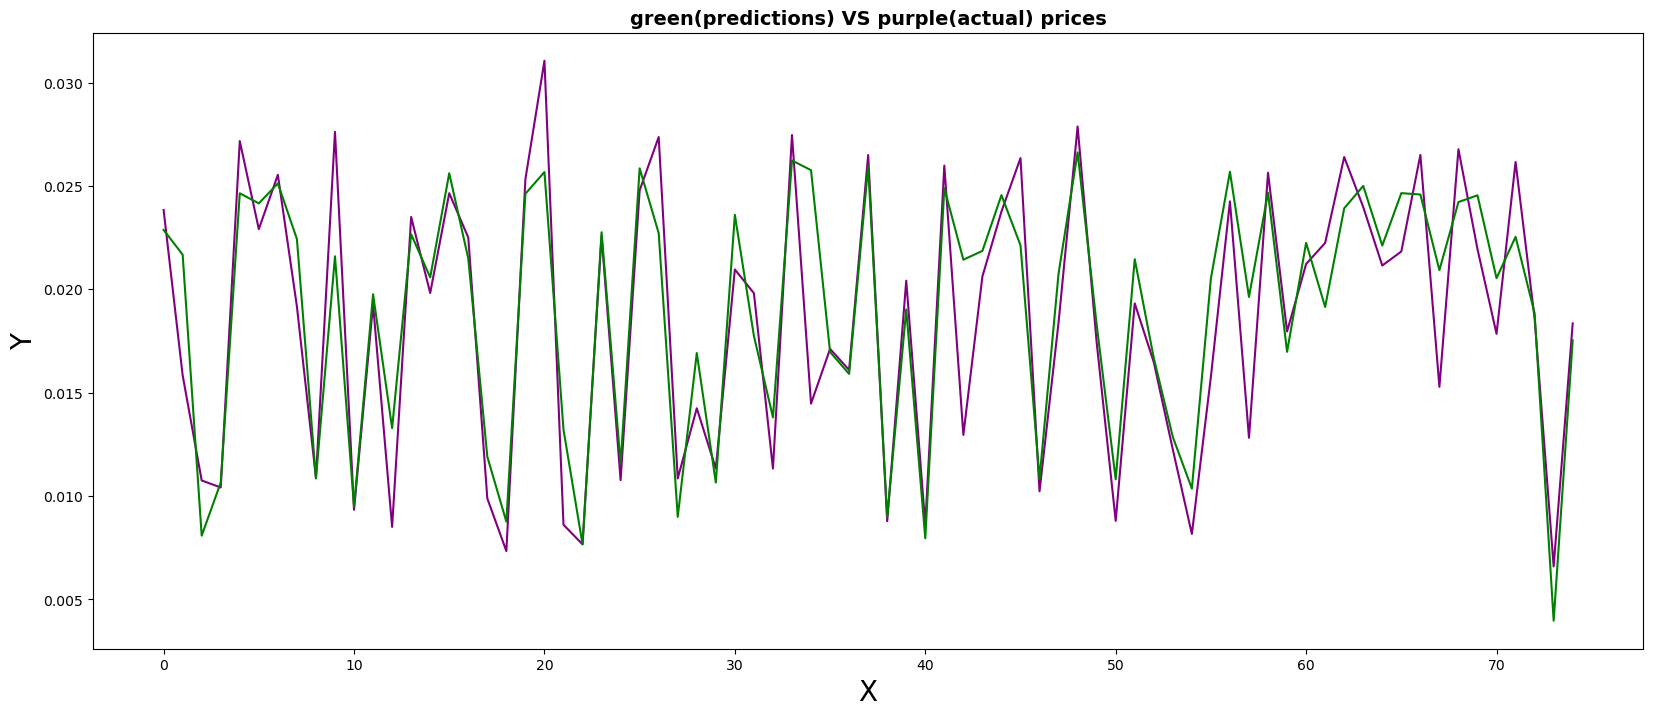

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 8))
plt.plot(y_test.to_numpy(dtype=object)[:100], color = "purple")
plt.plot(y_pred[:100], color = "green")
plt.title("green(predictions) VS purple(actual) prices", fontsize = 14, fontweight = "bold") #updated here
plt.ylabel("Y",fontsize = 20)
plt.xlabel("X",fontsize = 20)

plt.show()

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_y_predict = gbr.predict(X_test)

print("R-squared value of GradientBoostingRegressor: {sc}".format(sc = gbr.score(X_test, y_test)))
print("The mean squared error of GradientBoostingRegressor: {}".format(mean_squared_error(y_test, gbr_y_predict)))
print("The mean absoluate error of GradientBoostingRegressor: {}".format(mean_absolute_error(y_test,gbr_y_predict)))

R-squared value of GradientBoostingRegressor: 0.7336488448246604
The mean squared error of GradientBoostingRegressor: 1.1610409212011143e-05
The mean absoluate error of GradientBoostingRegressor: 0.0024784067033730536


Text(0.5, 1.0, 'The result of GradientBoostingRegressor')

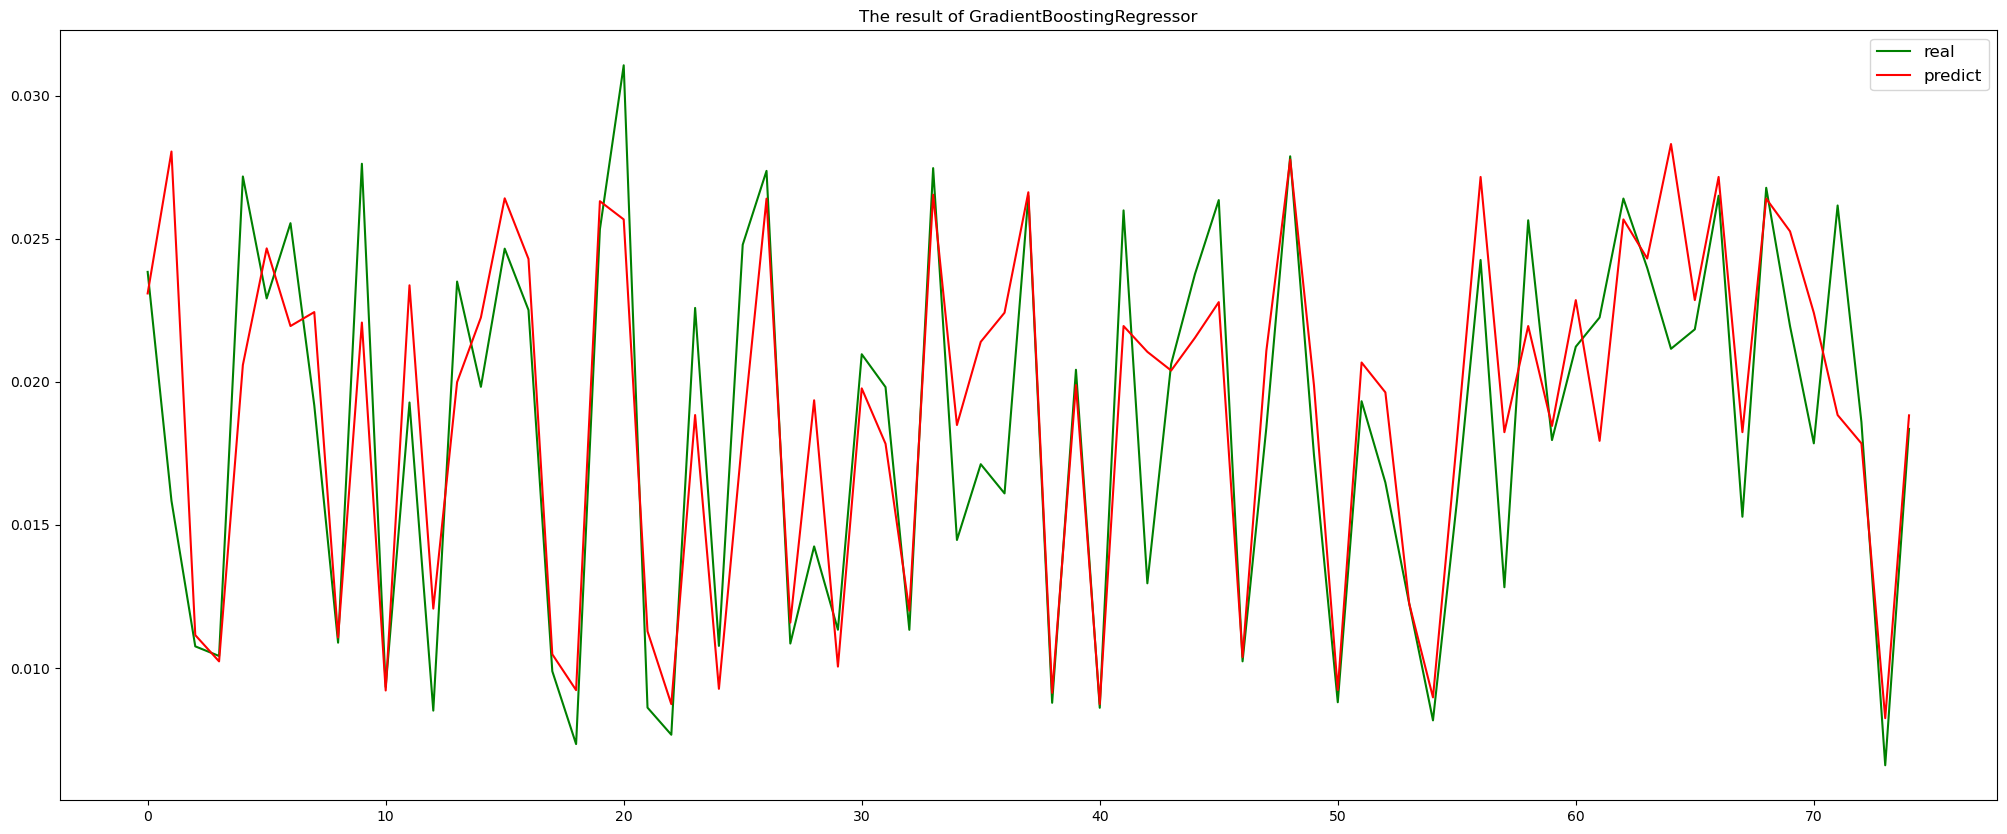

In [23]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='green')
plt.plot(gbr_y_predict[:100],c='red')  #predicts
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of GradientBoostingRegressor')

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data=scaler.transform(X_train),columns = X_train.columns,index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test),columns = X_test.columns,index=X_test.index)

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=500)
rfr.fit(X_train,y_train)
rfr_y_predict = rfr.predict(X_test)

print("R-squared value of RandomForestRegressor: {sc}".format(sc = rfr.score(X_test, y_test)))
print("The mean squared error of RandomForestRegressor: {}".format(mean_squared_error(y_test, rfr_y_predict)))
print("The mean absoluate error of RandomForestRegressor: {}".format(mean_absolute_error(y_test,rfr_y_predict)))
#BETTER

R-squared value of RandomForestRegressor: 0.7358001006574924
The mean squared error of RandomForestRegressor: 1.1516634658931159e-05
The mean absoluate error of RandomForestRegressor: 0.0024176657685546594


Text(0.5, 1.0, 'The result of RandomForestRegressor')

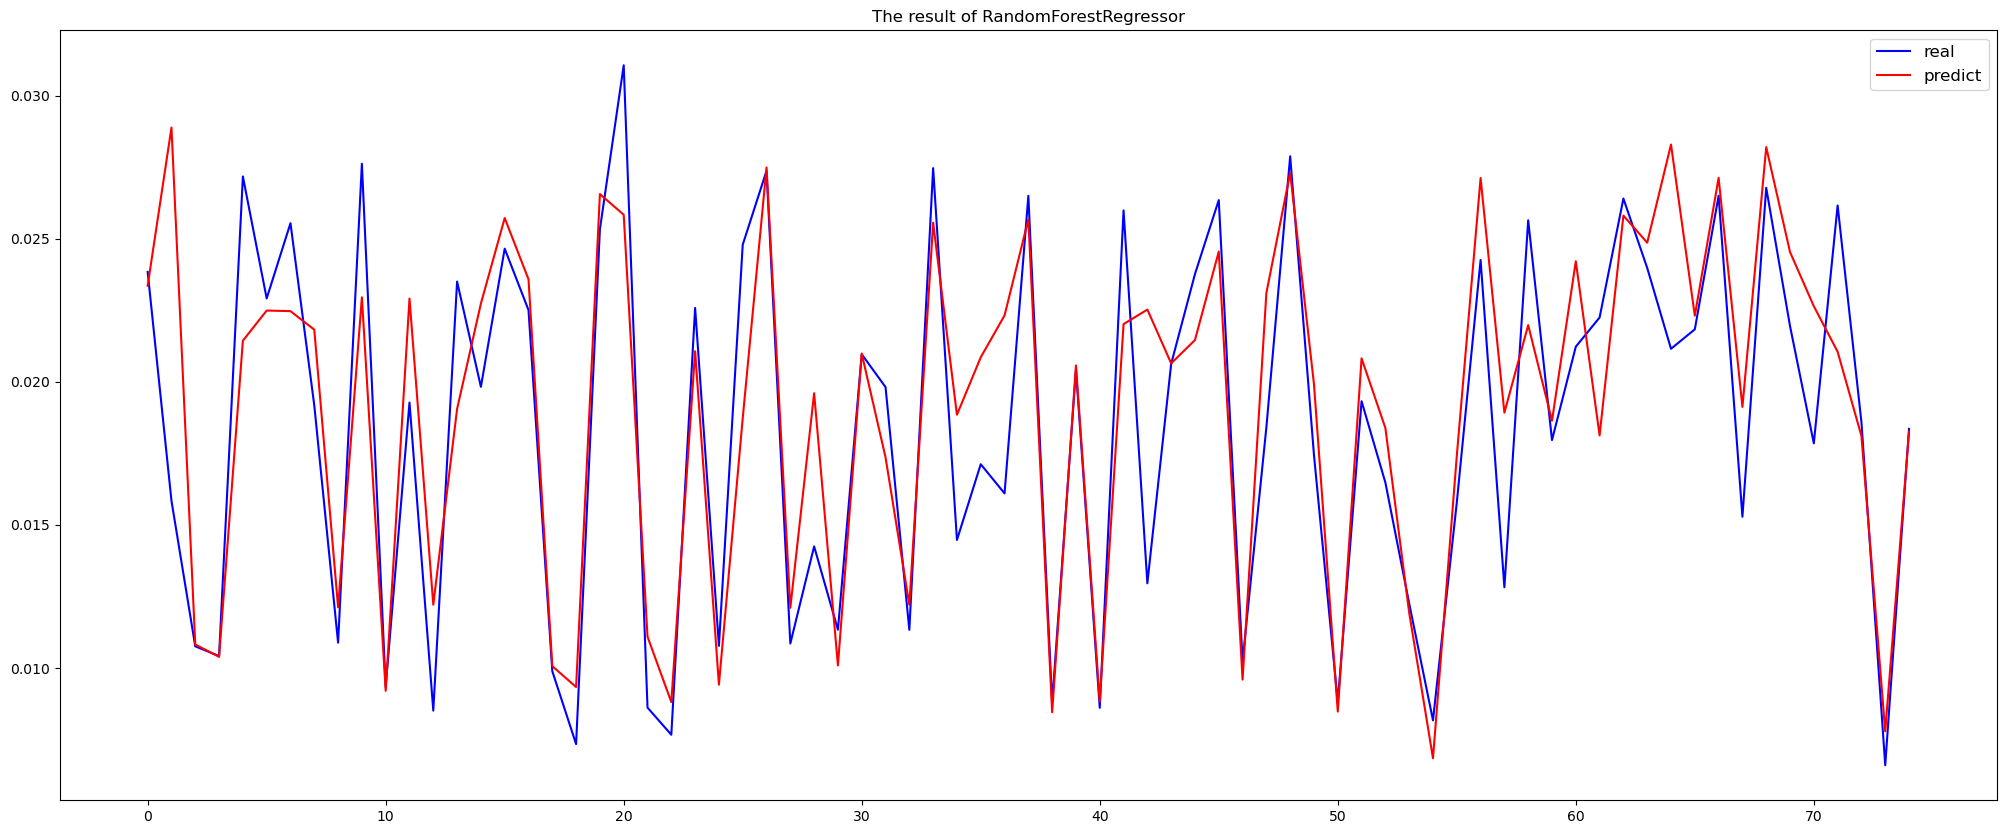

In [26]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:200],c='blue')
plt.plot(rfr_y_predict[:200],c='red')
plt.annotate(
# Label and coordinate
'outlier!', xy=(50, 115), xytext=(20, 120),

# Custom arrow
arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')

In [27]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('______')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)  # maybe parameter tuning
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)


print('Testing set evaluation:\n______')
print_evaluate(y_test, test_pred)
print('==*******==')
print('Training set evaluation:\n_____')
print_evaluate(y_train, train_pred)

Testing set evaluation:
______
MAE: 0.0024485649421816563
MSE: 1.1794963152225861e-05
RMSE: 0.00343437958767313
R2 Square 0.7294150444244559
______
==*******==
Training set evaluation:
_____
MAE: 0.0007859737017611463
MSE: 1.974244595082586e-06
RMSE: 0.0014050781455430107
R2 Square 0.9617446169672781
______


Text(0.5, 1.0, 'The result of RandomForestRegressor')

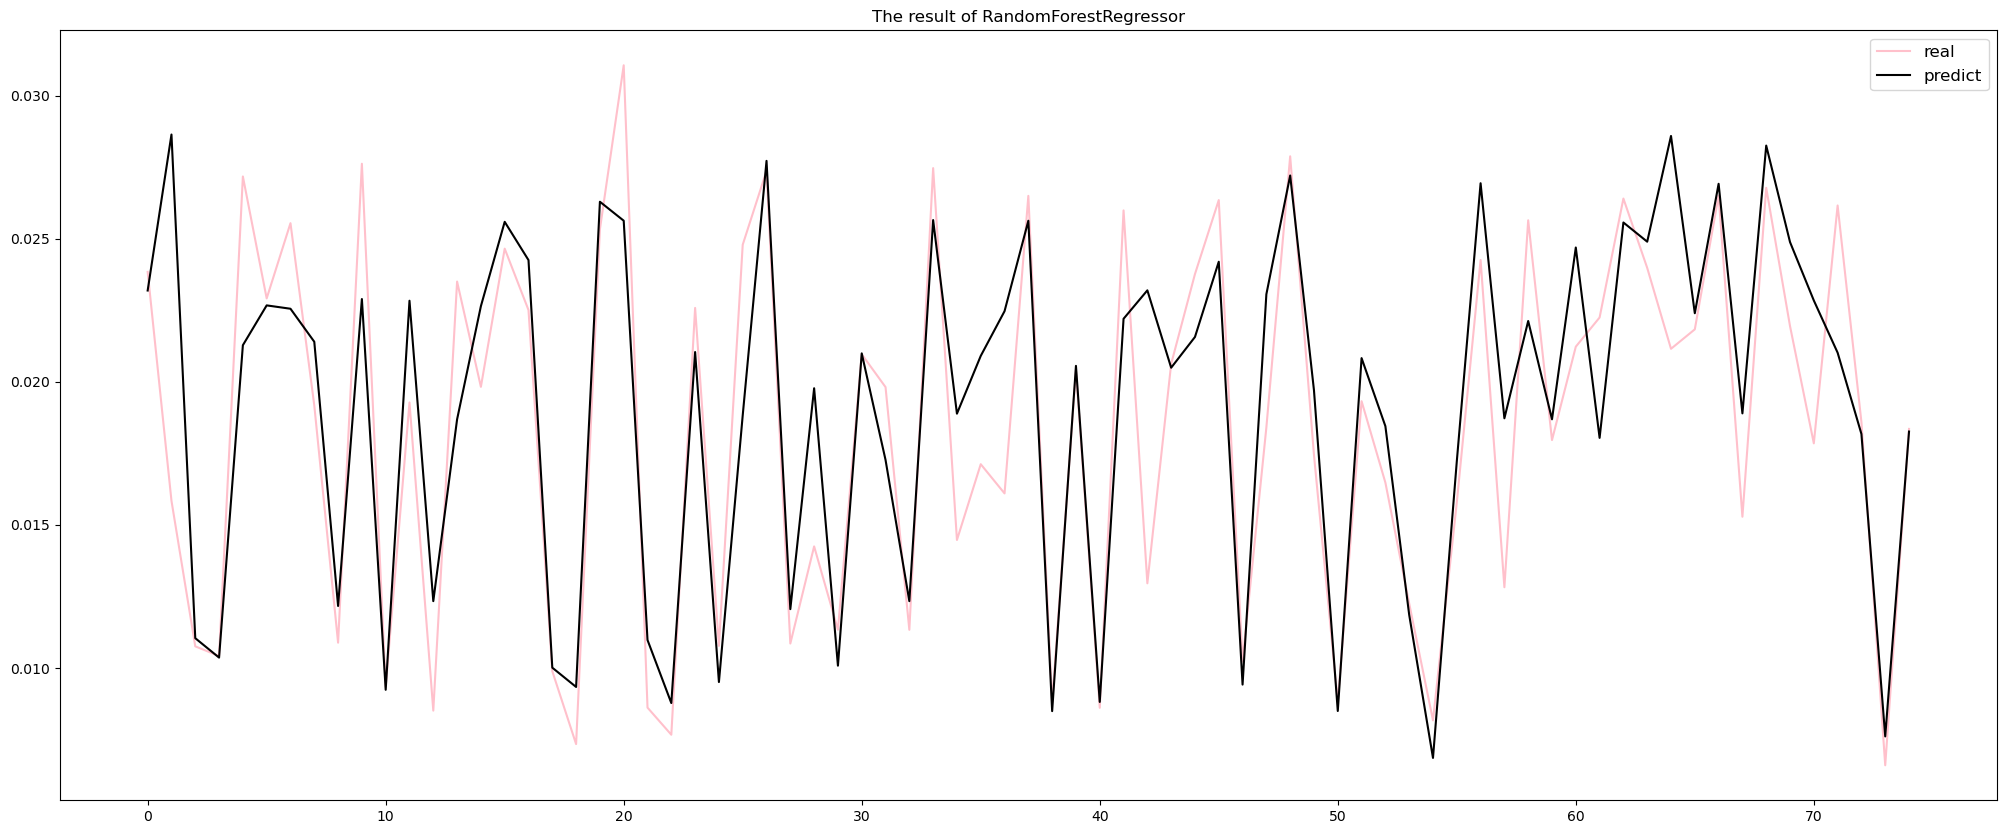

In [29]:
plt.figure(figsize=(25,10))
plt.plot(y_test.to_numpy(dtype=object)[:100],c='pink')
plt.plot(test_pred[:100],c='black')  #predicts
plt.annotate(

'Outlier!', xy=(50, 115), xytext=(0, 100),
 
# Custom arrow
arrowprops=dict(facecolor='red', shrink=0.05)
)
plt.legend(['real','predict'],fontsize="large")
plt.title('The result of RandomForestRegressor')